In [2]:
# Quaterly earning per Johnson And Johnson Share
# Fitting SARIMA(p,d,q,P,D,Q)
# varying all the parameter between 0<=pi<=1
library(astsa)

d=1
DD=1

per=4

for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:2){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(jj), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}


0 1 0 0 1 0 4 AIC= -124.0685  SSE= 0.9377871  p-VALUE= 0.0002610795 
0 1 0 0 1 1 4 AIC= -126.3493  SSE= 0.8856994  p-VALUE= 0.0001606542 
0 1 0 1 1 0 4 AIC= -125.9198  SSE= 0.8908544  p-VALUE= 0.0001978052 
0 1 0 1 1 1 4 AIC= -124.3648  SSE= 0.8854554  p-VALUE= 0.000157403 
0 1 1 0 1 0 4 AIC= -145.5139  SSE= 0.6891988  p-VALUE= 0.03543717 
0 1 1 0 1 1 4 AIC= -150.7528  SSE= 0.6265214  p-VALUE= 0.6089542 
0 1 1 1 1 0 4 AIC= -150.9134  SSE= 0.6251634  p-VALUE= 0.7079173 
0 1 1 1 1 1 4 AIC= -149.1317  SSE= 0.6232876  p-VALUE= 0.6780876 
1 1 0 0 1 0 4 AIC= -139.8248  SSE= 0.7467494  p-VALUE= 0.03503386 
1 1 0 0 1 1 4 AIC= -146.0191  SSE= 0.6692691  p-VALUE= 0.5400205 
1 1 0 1 1 0 4 AIC= -146.0319  SSE= 0.6689661  p-VALUE= 0.5612964 
1 1 0 1 1 1 4 AIC= -144.3766  SSE= 0.6658382  p-VALUE= 0.5459445 
1 1 1 0 1 0 4 AIC= -145.8284  SSE= 0.667109  p-VALUE= 0.2200484 
1 1 1 0 1 1 4 AIC= -148.7706  SSE= 0.6263677  p-VALUE= 0.594822 
1 1 1 1 1 0 4 AIC= -148.9175  SSE= 0.6251104  p-VALUE= 0.7195469 

In [3]:
print(jj)

          Qtr1      Qtr2      Qtr3      Qtr4
1960  0.710000  0.630000  0.850000  0.440000
1961  0.610000  0.690000  0.920000  0.550000
1962  0.720000  0.770000  0.920000  0.600000
1963  0.830000  0.800000  1.000000  0.770000
1964  0.920000  1.000000  1.240000  1.000000
1965  1.160000  1.300000  1.450000  1.250000
1966  1.260000  1.380000  1.860000  1.560000
1967  1.530000  1.590000  1.830000  1.860000
1968  1.530000  2.070000  2.340000  2.250000
1969  2.160000  2.430000  2.700000  2.250000
1970  2.790000  3.420000  3.690000  3.600000
1971  3.600000  4.320000  4.320000  4.050000
1972  4.860000  5.040000  5.040000  4.410000
1973  5.580000  5.850000  6.570000  5.310000
1974  6.030000  6.390000  6.930000  5.850000
1975  6.930000  7.740000  7.830000  6.120000
1976  7.740000  8.910000  8.280000  6.840000
1977  9.540000 10.260000  9.540000  8.729999
1978 11.880000 12.060000 12.150000  8.910000
1979 14.040000 12.960000 14.850000  9.990000
1980 16.200000 14.670000 16.020000 11.610000


Data shows some kind of trend 
As the time increases the variability in the data keeps on increasing
This is known as Heteroscedasticity
To remove the trend we first take the log of the data and apply differencing on it

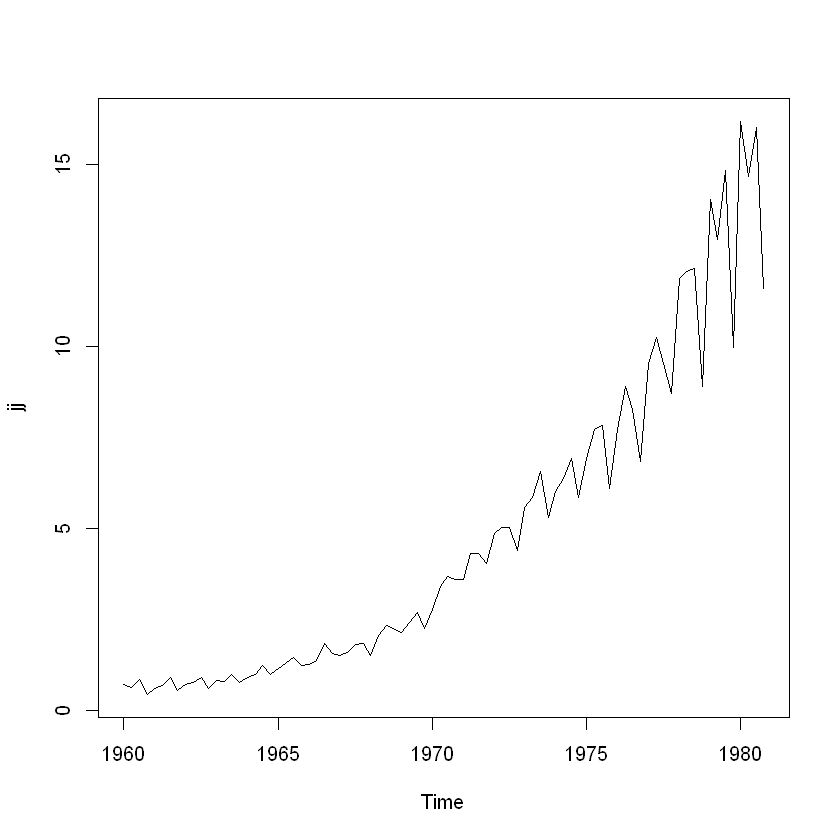

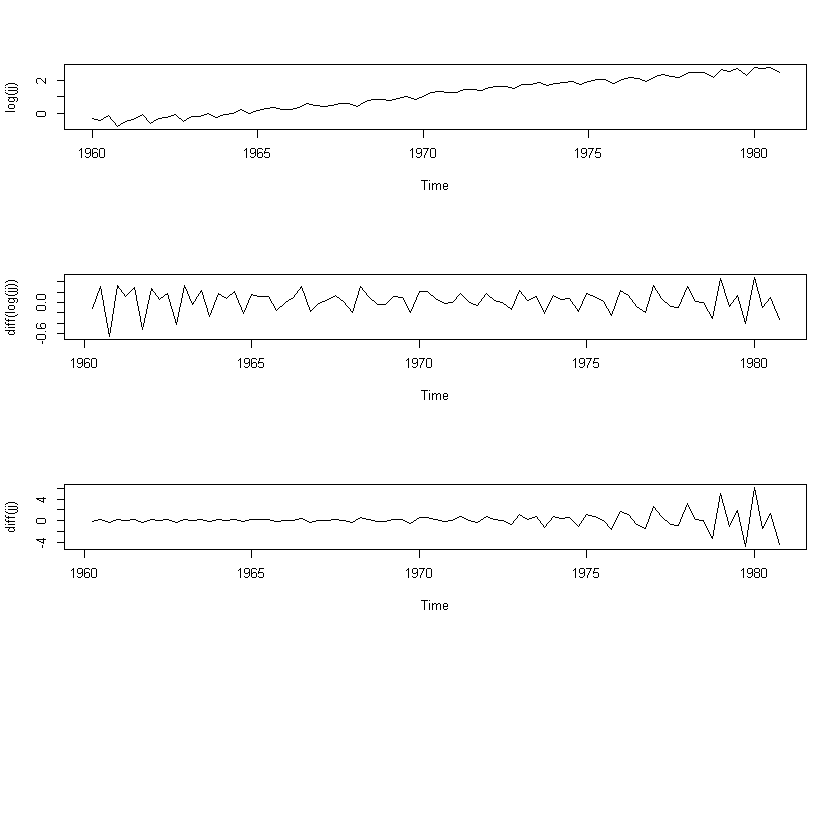

In [13]:
plot(jj)
par(mfrow = c(4,1))
plot(log(jj))
plot(diff(log(jj)))
plot(diff(jj))

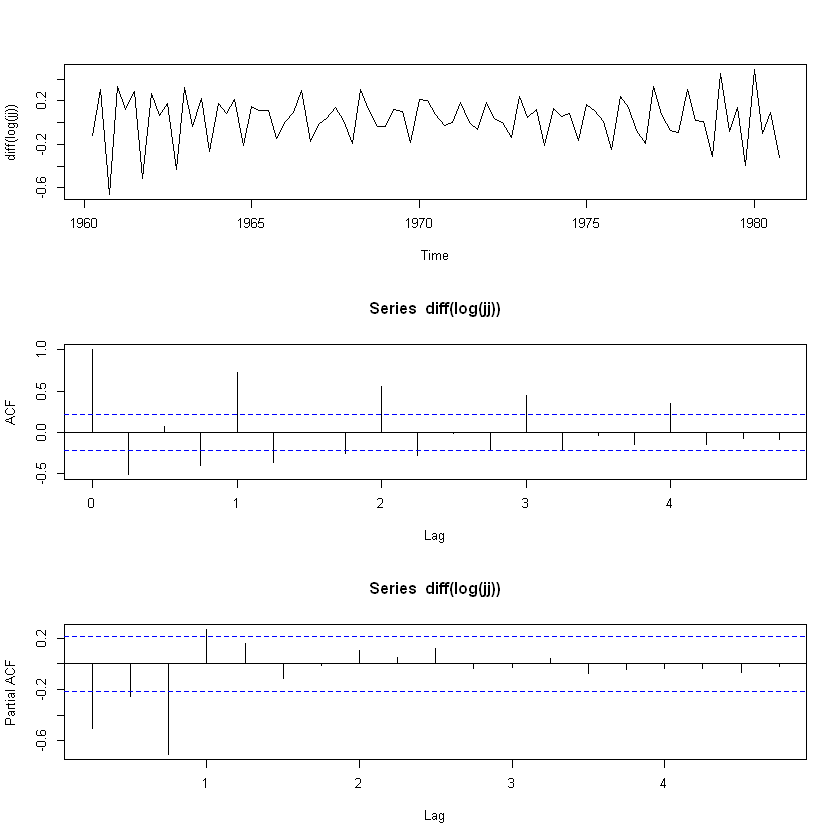

In [9]:
par(mfrow = c(3,1))
plot(diff(log(jj)))
acf(diff(log(jj)))
acf(diff(log(jj)), type = "partial")

Now we take the seasonal diffrencing with span of season as 4 since the data is quaterly

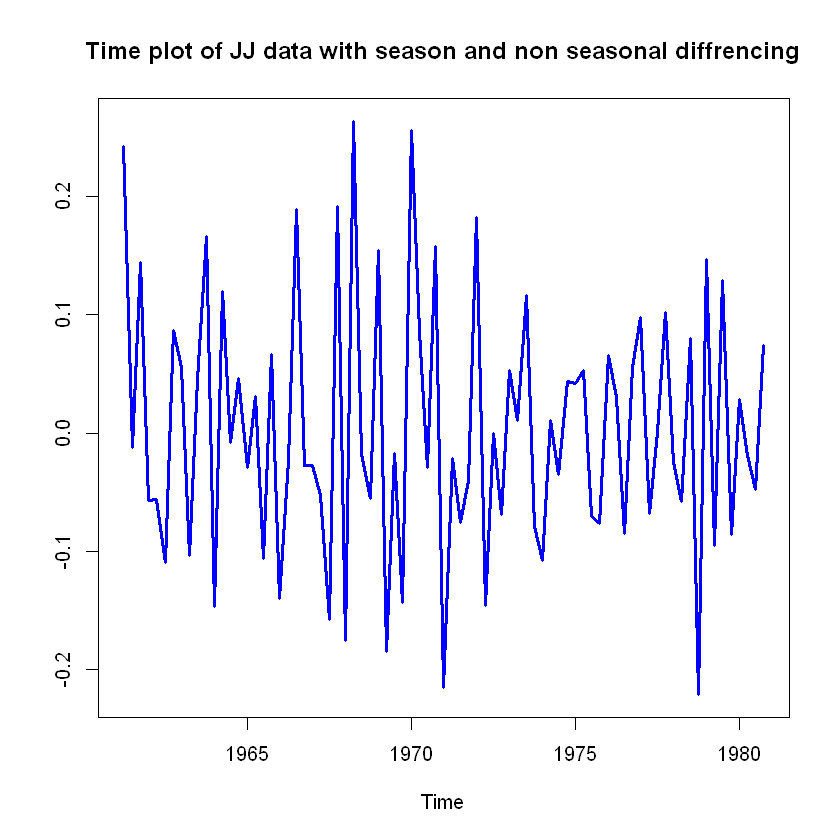

In [20]:
plot(diff(diff(log(jj)),4), main = "Time plot of JJ data with season and non seasonal diffrencing", ylab ="", xlab= "Time", col ="blue", lw = 3 )


Now we test for autocorrelation between the lags using Ljung Box Test

In [23]:
data = diff(diff(log(jj)),4)
Box.test(data, lag =log(length(data)))


	Box-Pierce test

data:  data
X-squared = 20.95, df = 4.3694, p-value = 0.0004658


Since p is less than alpha for any reasonably small alpha. 
We reject the null hypothesis that the there is no autocorrelation between the lags of seaseonal and non-seasonal diffrenced logarithm of the data 

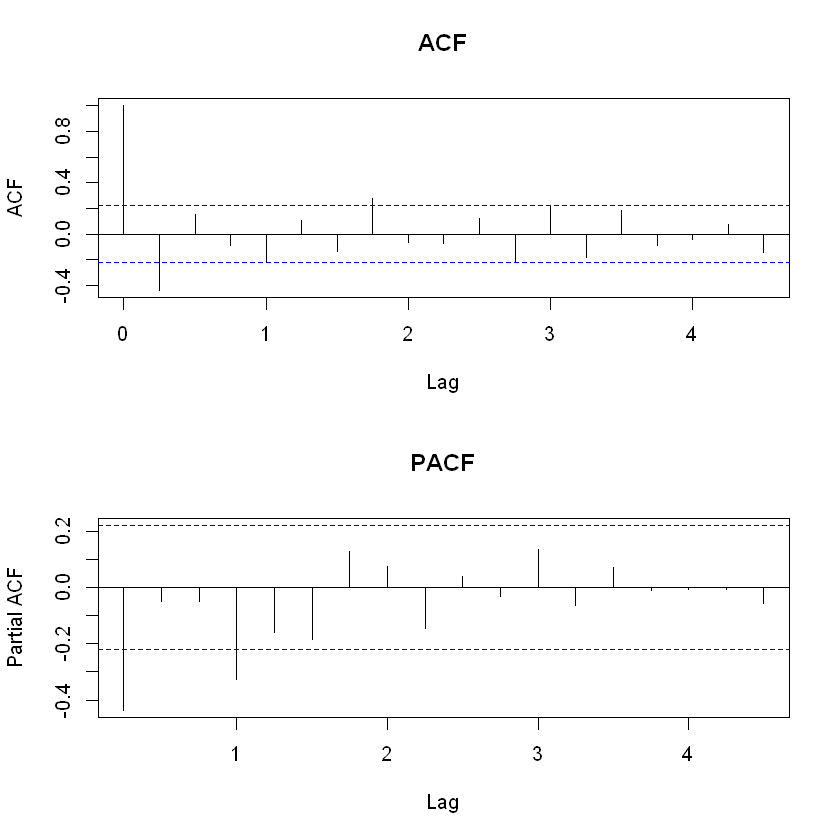

In [26]:
par(mfrow = c(2,1))
acf(data, main = "ACF")
acf(data, type = "partial", main = "PACF")

From the plots
- ACF p = 0,1 P = 0,1
- PACF q = 0,1 Q = 0,1
- 0<=p,q,P,Q<=1

initial  value -2.237259 
iter   2 value -2.429075
iter   3 value -2.446738
iter   4 value -2.455821
iter   5 value -2.459761
iter   6 value -2.462511
iter   7 value -2.462602
iter   8 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
final  value -2.462749 
converged
initial  value -2.411490 
iter   2 value -2.412022
iter   3 value -2.412060
iter   4 value -2.412062
iter   4 value -2.412062
iter   4 value -2.412062
final  value -2.412062 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1     sar1
      -0.6796  -0.3220
s.e.   0.0969   0.1124

sigma^2 estimated as 0.007913:  log likelihood = 78.46,  aic = -150.91

$degrees_of_freedom
[1] 77

$ttable
     Estimate     SE t.value p.value
ma1   -0.6796 0.0969 -7.0104  0.0000
sar1  -0.3220 0.1124 -2.8641  0.0054

$AIC
[1] -1.840408

$AICc
[1] -1.838555

$BIC
[1] -1.753721


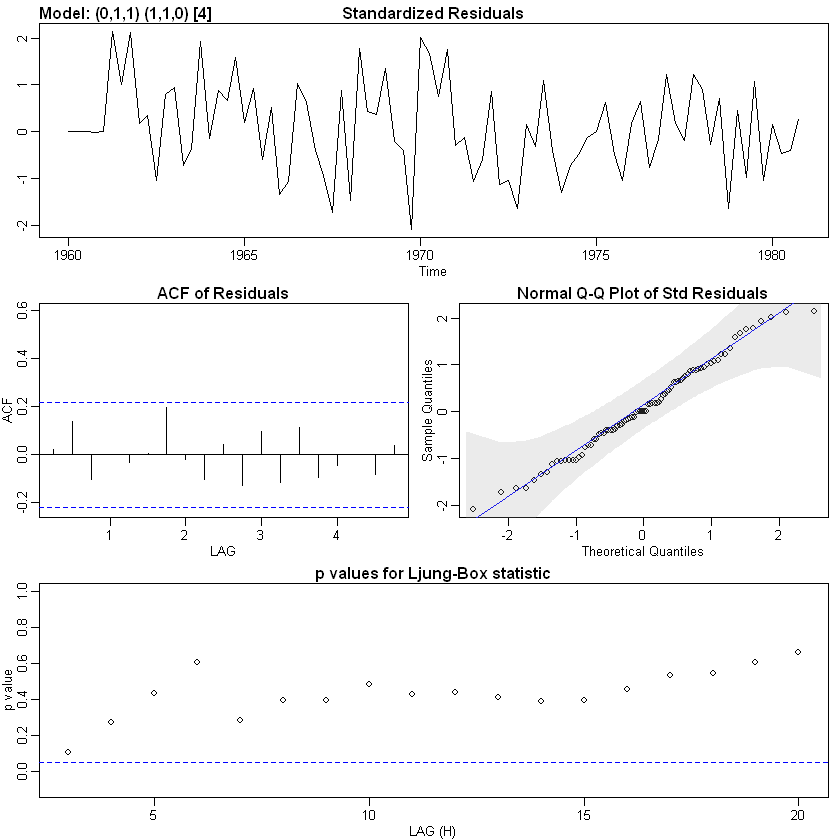

In [28]:
library(astsa)
sarima(log(jj),0,1,1,1,1,0,4 )

So we have fotted SARIMA(0,1,1,1,1,0)_4

Now we can forcast 

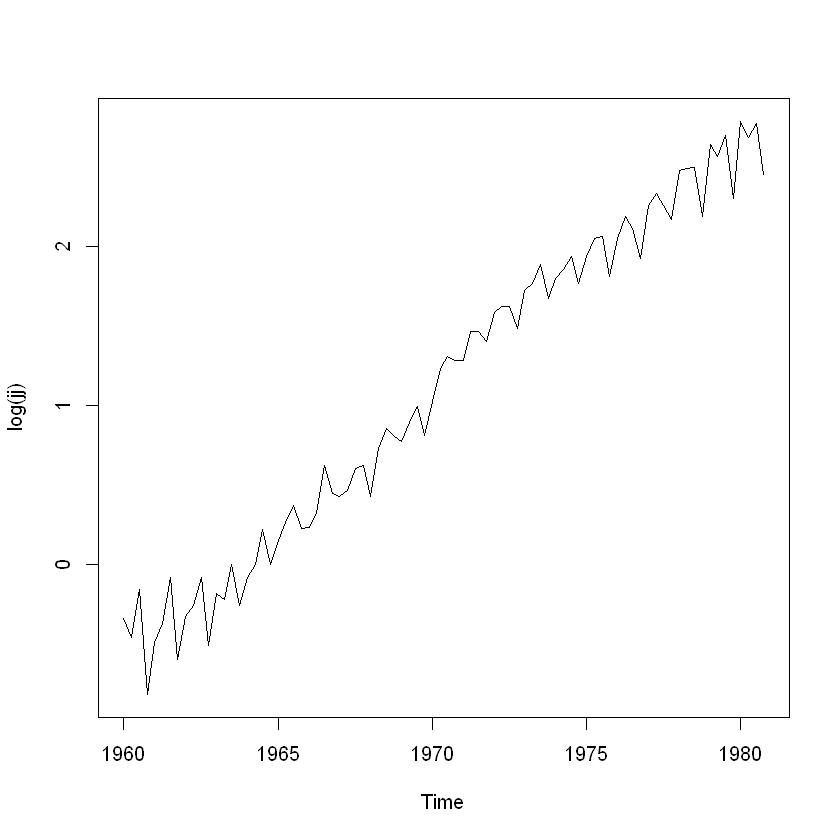

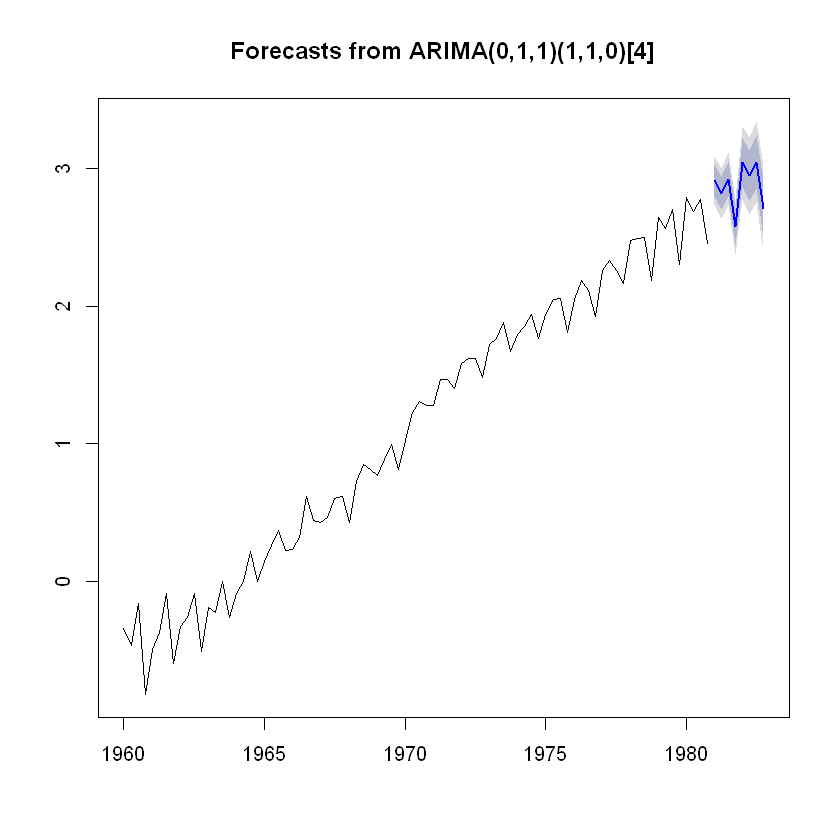

In [34]:
library(forecast)
plot(log(jj))
model <- arima(x = log(jj), order = c(0,1,1), seasonal = list(order = c(1,1,0), period = 4))
plot(forecast(model))

In [36]:
forecast(model)

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1981 Q1       2.910254 2.796250 3.024258 2.735900 3.084608
1981 Q2       2.817218 2.697507 2.936929 2.634135 3.000300
1981 Q3       2.920738 2.795580 3.045896 2.729325 3.112151
1981 Q4       2.574797 2.444419 2.705175 2.375401 2.774194
1982 Q1       3.041247 2.868176 3.214317 2.776559 3.305934
1982 Q2       2.946224 2.762623 3.129824 2.665431 3.227016
1982 Q3       3.044757 2.851198 3.238316 2.748735 3.340780
1982 Q4       2.706534 2.503505 2.909564 2.396028 3.017041